In [1]:
!unzip CMaps.zip

Archive:  CMaps.zip
   creating: CMaps/
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/readme.txt        
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [27]:
import pandas as pd

# Specify the directory where you've unzipped your data
data_dir = 'CMaps/'

# Load training datasets
train_FD001 = pd.read_csv(data_dir + 'train_FD001.txt', sep=" ", header=None)
train_FD002 = pd.read_csv(data_dir + 'train_FD002.txt', sep=" ", header=None)
train_FD003 = pd.read_csv(data_dir + 'train_FD003.txt', sep=" ", header=None)
train_FD004 = pd.read_csv(data_dir + 'train_FD004.txt', sep=" ", header=None)

# Load testing datasets
test_FD001 = pd.read_csv(data_dir + 'test_FD001.txt', sep=" ", header=None)
test_FD002 = pd.read_csv(data_dir + 'test_FD002.txt', sep=" ", header=None)
test_FD003 = pd.read_csv(data_dir + 'test_FD003.txt', sep=" ", header=None)
test_FD004 = pd.read_csv(data_dir + 'test_FD004.txt', sep=" ", header=None)

# Load remaining useful life (RUL) datasets
RUL_FD001 = pd.read_csv(data_dir + 'RUL_FD001.txt', sep=" ", header=None)
RUL_FD002 = pd.read_csv(data_dir + 'RUL_FD002.txt', sep=" ", header=None)
RUL_FD003 = pd.read_csv(data_dir + 'RUL_FD003.txt', sep=" ", header=None)
RUL_FD004 = pd.read_csv(data_dir + 'RUL_FD004.txt', sep=" ", header=None)



In [28]:
#print shapes of above dataframes
print("train_FD001 shape: ", train_FD001.shape)
print("train_FD002 shape: ", train_FD002.shape)
print("train_FD003 shape: ", train_FD003.shape)
print("train_FD004 shape: ", train_FD004.shape)
print("test_FD001 shape: ", test_FD001.shape)
print("test_FD002 shape: ", test_FD002.shape)
print("test_FD003 shape: ", test_FD003.shape)
print("test_FD004 shape: ", test_FD004.shape)
print("RUL_FD001 shape: ", RUL_FD001.shape)
print("RUL_FD002 shape: ", RUL_FD002.shape)
print("RUL_FD003 shape: ", RUL_FD003.shape)
print("RUL_FD004 shape: ", RUL_FD004.shape)

train_FD001 shape:  (20631, 28)
train_FD002 shape:  (53759, 28)
train_FD003 shape:  (24720, 28)
train_FD004 shape:  (61249, 28)
test_FD001 shape:  (13096, 28)
test_FD002 shape:  (33991, 28)
test_FD003 shape:  (16596, 28)
test_FD004 shape:  (41214, 28)
RUL_FD001 shape:  (100, 2)
RUL_FD002 shape:  (259, 2)
RUL_FD003 shape:  (100, 2)
RUL_FD004 shape:  (248, 2)


In [29]:
def preprocess_train_data(df):
    # Label columns (based on the readme file)
    column_names = ['unit_number', 'time', 'operational_setting_1', 'operational_setting_2',
                    'operational_setting_3'] + ['sensor_measurement_' + str(i) for i in range(1, 24)]
    df.columns = column_names

    # Calculate max cycle for each unit
    df_group = df.groupby('unit_number')['time'].max().reset_index()
    df_group.columns = ['unit_number', 'max_cycle']

    # Merge max cycle back into original frame
    df = pd.merge(df, df_group, on='unit_number', how='left')

    # Calculate RUL (remaining useful life) for each row
    df['RUL'] = df['max_cycle'] - df['time']
    df.drop('max_cycle', axis=1, inplace=True)

    return df

# Preprocess training data
train_FD001 = preprocess_train_data(train_FD001)
train_FD002 = preprocess_train_data(train_FD002)
train_FD003 = preprocess_train_data(train_FD003)
train_FD004 = preprocess_train_data(train_FD004)

#print heads of above dataframes
display(train_FD001)
display(train_FD002)
display(train_FD003)
display(train_FD004)

,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN,1


,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,9.3035,0.03,369,2324,100.00,24.36,14.5189,NaN,NaN,4
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8.7586,0.03,374,2319,100.00,28.10,16.9454,NaN,NaN,3
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,11.0657,0.02,310,1915,84.93,14.19,8.5503,NaN,NaN,2
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,11.0537,0.02,311,1915,84.93,14.05,8.3729,NaN,NaN,1


,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8.5036,0.03,394,2388,100.0,38.44,22.9631,NaN,NaN,4
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8.5174,0.03,395,2388,100.0,38.50,22.9746,NaN,NaN,3
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8.5223,0.03,396,2388,100.0,38.39,23.0682,NaN,NaN,2
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8.5148,0.03,395,2388,100.0,38.31,23.0753,NaN,NaN,1


,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8.4541,0.03,372,2319,100.00,29.11,17.5234,NaN,NaN,4
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8.2221,0.03,396,2388,100.00,39.38,23.7151,NaN,NaN,3
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8.2525,0.03,395,2388,100.00,39.78,23.8270,NaN,NaN,2
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,9.0515,0.02,337,2223,100.00,15.26,9.0774,NaN,NaN,1


In [30]:
def preprocess_test_data(df):
    # Label columns (based on the readme file)
    column_names = ['unit_number', 'time', 'operational_setting_1', 'operational_setting_2',
                    'operational_setting_3'] + ['sensor_measurement_' + str(i) for i in range(1, 24)]
    df.columns = column_names

    return df

# Preprocess test data
test_FD001 = preprocess_test_data(test_FD001)
test_FD002 = preprocess_test_data(test_FD002)
test_FD003 = preprocess_test_data(test_FD003)
test_FD004 = preprocess_test_data(test_FD004)

In [31]:
display(test_FD001)
display(test_FD002)
display(test_FD003)
display(test_FD004)

,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,NaN,NaN
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,NaN,NaN
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,NaN,NaN
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,NaN,NaN


,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,NaN,NaN
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,NaN,NaN
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,NaN,NaN
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,NaN,NaN
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,NaN,NaN
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,NaN,NaN
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,NaN,NaN
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,NaN,NaN


,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,NaN,NaN
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,NaN,NaN
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,NaN,NaN
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,NaN,NaN
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,NaN,NaN
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,NaN,NaN
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,NaN,NaN
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,NaN,NaN


In [32]:
def preprocess_rul_data(rul):
    # Convert RUL list into a DataFrame
    rul_df = pd.DataFrame(rul, columns=['RUL'])

    # Add unit numbers to the RUL DataFrame
    rul_df['unit_number'] = rul_df.index + 1

    return rul_df

# Load RUL data for each set
RUL_FD001 = preprocess_rul_data(pd.read_csv(data_dir + 'RUL_FD001.txt', header=None, squeeze=True).values)
RUL_FD002 = preprocess_rul_data(pd.read_csv(data_dir + 'RUL_FD002.txt', header=None, squeeze=True).values)
RUL_FD003 = preprocess_rul_data(pd.read_csv(data_dir + 'RUL_FD003.txt', header=None, squeeze=True).values)
RUL_FD004 = preprocess_rul_data(pd.read_csv(data_dir + 'RUL_FD004.txt', header=None, squeeze=True).values)


<ipython-input-32-f6b36958c1d5>:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  RUL_FD001 = preprocess_rul_data(pd.read_csv(data_dir + 'RUL_FD001.txt', header=None, squeeze=True).values)
<ipython-input-32-f6b36958c1d5>:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  RUL_FD002 = preprocess_rul_data(pd.read_csv(data_dir + 'RUL_FD002.txt', header=None, squeeze=True).values)
<ipython-input-32-f6b36958c1d5>:13: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  RUL_FD003 = preprocess_rul_data(pd.read_csv(data_dir + 'RUL_FD003.txt', header=None, squeeze=True).values)
<ipython-input-32-f6b36958c1d5>:14: FutureWarning: The squeeze argument has been deprecated and will be removed in 

In [33]:
def preprocess_test_data(df, rul_df):
    # Label columns (based on the readme file)
    column_names = ['unit_number', 'time', 'operational_setting_1', 'operational_setting_2',
                    'operational_setting_3'] + ['sensor_measurement_' + str(i) for i in range(1, 24)]
    df.columns = column_names

    # Fetch last cycle for each unit in test data
    df_last_cycle = df.groupby('unit_number').last().reset_index()

    # Join with RUL data
    df_last_cycle = df_last_cycle.merge(rul_df, on='unit_number')

    return df_last_cycle

# Preprocess test data and join with RUL data
test_FD001 = preprocess_test_data(test_FD001, RUL_FD001)
test_FD002 = preprocess_test_data(test_FD002, RUL_FD002)
test_FD003 = preprocess_test_data(test_FD003, RUL_FD003)
test_FD004 = preprocess_test_data(test_FD004, RUL_FD004)


In [34]:
test_FD002

,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,258,10.0076,0.2501,100.0,489.05,605.42,1515.00,1325.07,10.52,...,8.7456,0.03,371,2319,100.0,28.30,17.0934,NaN,NaN,18
1,2,55,0.0018,0.0000,100.0,518.67,642.67,1591.67,1418.17,14.62,...,8.4248,0.03,393,2388,100.0,38.82,23.3463,NaN,NaN,79
2,3,165,35.0015,0.8412,100.0,449.44,555.86,1370.62,1135.59,5.48,...,9.3094,0.02,332,2223,100.0,14.75,8.9589,NaN,NaN,106
3,4,86,20.0032,0.7000,100.0,491.19,607.99,1487.94,1257.49,9.35,...,9.2349,0.02,365,2324,100.0,24.22,14.6814,NaN,NaN,110
4,5,148,42.0055,0.8400,100.0,445.00,550.81,1358.95,1140.34,3.91,...,9.3964,0.02,333,2212,100.0,10.34,6.3601,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,255,150,42.0064,0.8400,100.0,445.00,549.07,1353.72,1123.42,3.91,...,9.3592,0.02,331,2212,100.0,10.48,6.4609,NaN,NaN,122
255,256,59,10.0042,0.2500,100.0,489.05,604.76,1501.00,1308.18,10.52,...,8.6462,0.03,369,2319,100.0,28.52,17.2240,NaN,NaN,191
256,257,199,35.0072,0.8400,100.0,449.44,555.76,1369.89,1128.03,5.48,...,9.3123,0.02,333,2223,100.0,14.98,8.8467,NaN,NaN,56
257,258,98,0.0002,0.0006,100.0,518.67,641.89,1590.52,1398.15,14.62,...,8.4176,0.03,391,2388,100.0,39.00,23.4591,NaN,NaN,131


In [35]:
train_FD001.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_measurement_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_measurement_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_measurement_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_measurement_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [47]:
train_FD001

,unit_number,time,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN,1


In [ ]:
def engineer_features(df, window=5):
    sensor_columns = [col for col in df.columns if 'sensor_measurement' in col]
    df_new = df.copy()

    for col in sensor_columns:
        # Calculate rolling average
        df_new[col + '_rollingavg'] = df_new.groupby('unit_number')[col].transform(lambda x: x.rolling(window).mean())

        # Calculate rolling max
        df_new[col + '_max'] = df_new.groupby('unit_number')[col].transform(lambda x: x.rolling(window).max())

        # Calculate rolling min
        df_new[col + '_min'] = df_new.groupby('unit_number')[col].transform(lambda x: x.rolling(window).min())

    return df_new



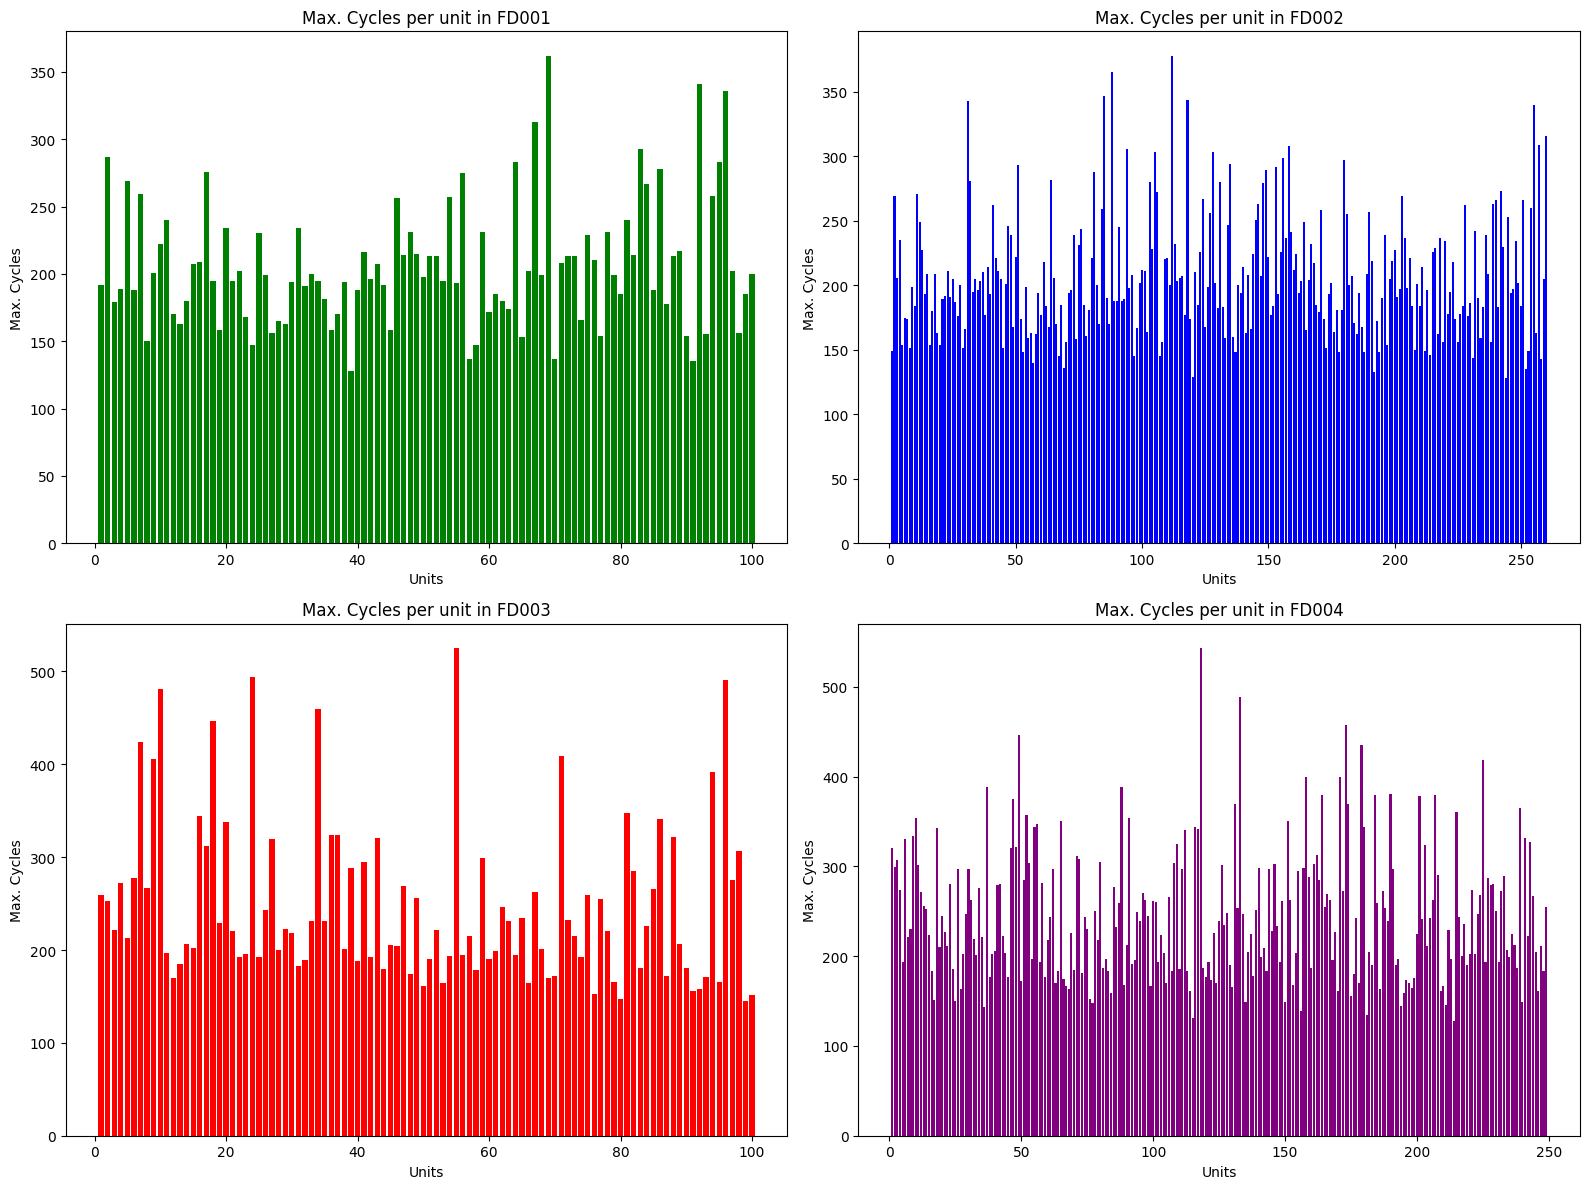

In [41]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(16,12))

# Plot for train_FD001
axs[0, 0].bar(list(train_FD001['unit_number']), train_FD001['time'], color='green')
axs[0, 0].set_title('Max. Cycles per unit in FD001')
axs[0, 0].set_xlabel('Units')
axs[0, 0].set_ylabel('Max. Cycles')

# Plot for train_FD002
axs[0, 1].bar(list(train_FD002['unit_number']), train_FD002['time'], color='blue')
axs[0, 1].set_title('Max. Cycles per unit in FD002')
axs[0, 1].set_xlabel('Units')
axs[0, 1].set_ylabel('Max. Cycles')

# Plot for train_FD003
axs[1, 0].bar(list(train_FD003['unit_number']), train_FD003['time'], color='red')
axs[1, 0].set_title('Max. Cycles per unit in FD003')
axs[1, 0].set_xlabel('Units')
axs[1, 0].set_ylabel('Max. Cycles')

# Plot for train_FD004
axs[1, 1].bar(list(train_FD004['unit_number']), train_FD004['time'], color='purple')
axs[1, 1].set_title('Max. Cycles per unit in FD004')
axs[1, 1].set_xlabel('Units')
axs[1, 1].set_ylabel('Max. Cycles')

# Adjust the layout
plt.tight_layout()
plt.show()


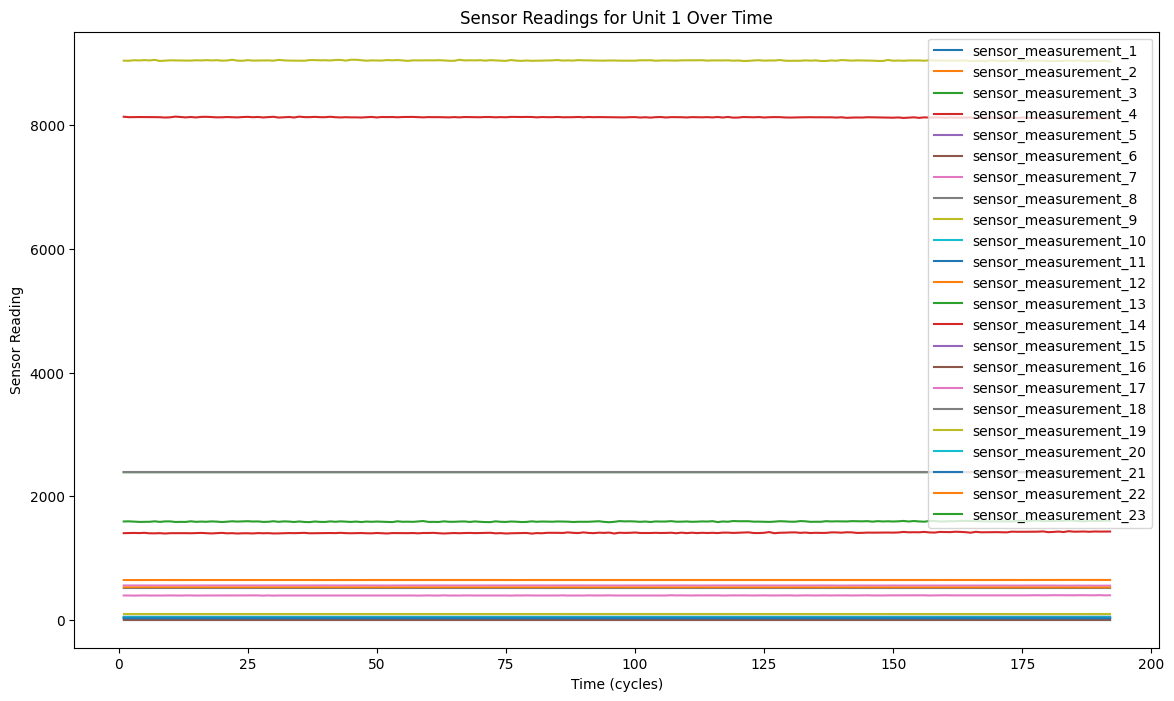

In [44]:
def visualize_all_sensors(df, unit_number):
    '''
    df: The dataframe that contains the data
    unit_number: The unit to visualize
    '''

    # Filter the data for the given unit
    unit_data = df[df['unit_number'] == unit_number]

    # Find the sensor columns
    sensor_cols = [col for col in df.columns if 'sensor_measurement' in col]

    # Set the size of the figure
    plt.figure(figsize=(14, 8))

    # For each sensor
    for sensor in sensor_cols:
        # Plot the sensor data
        plt.plot(unit_data['time'], unit_data[sensor], label=sensor)

    # Add labels and legend
    plt.xlabel('Time (cycles)')
    plt.ylabel('Sensor Reading')
    plt.legend()
    plt.title(f'Sensor Readings for Unit {unit_number} Over Time')

    # Show the plot
    plt.show()

# Example usage:
visualize_all_sensors(train_FD001, 1)


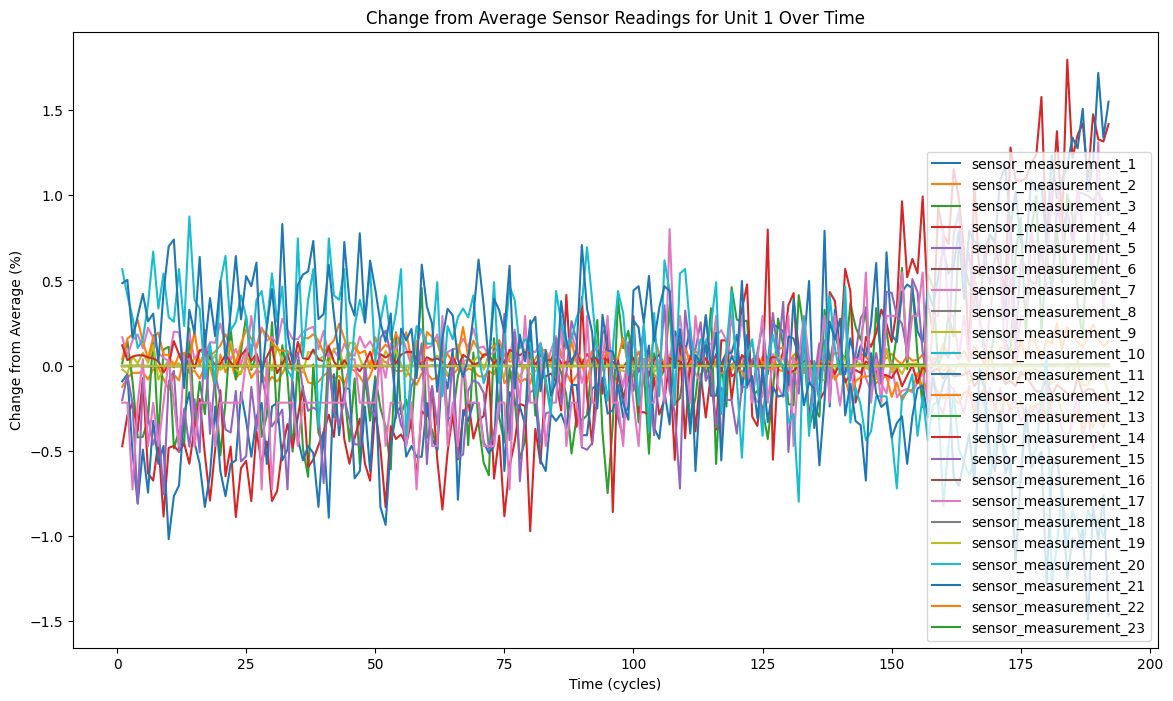

In [46]:
def visualize_sensor_change_from_average(df, unit_number):
    '''
    df: The dataframe that contains the data
    unit_number: The unit to visualize
    '''

    # Filter the data for the given unit
    unit_data = df[df['unit_number'] == unit_number]

    # Find the sensor columns
    sensor_cols = [col for col in df.columns if 'sensor_measurement' in col]

    # Set the size of the figure
    plt.figure(figsize=(14, 8))

    # For each sensor
    for sensor in sensor_cols:
        # Calculate the average sensor value
        avg_sensor_value = unit_data[sensor].mean()

        # Calculate the percentage change from the average
        change_from_avg = ((unit_data[sensor] - avg_sensor_value) / avg_sensor_value) * 100

        # Plot the percentage change from average
        plt.plot(unit_data['time'], change_from_avg, label=sensor)

    # Add labels and legend
    plt.xlabel('Time (cycles)')
    plt.ylabel('Change from Average (%)')
    plt.legend()
    plt.title(f'Change from Average Sensor Readings for Unit {unit_number} Over Time')

    # Show the plot
    plt.show()

# Example usage:
visualize_sensor_change_from_average(train_FD001, 1)


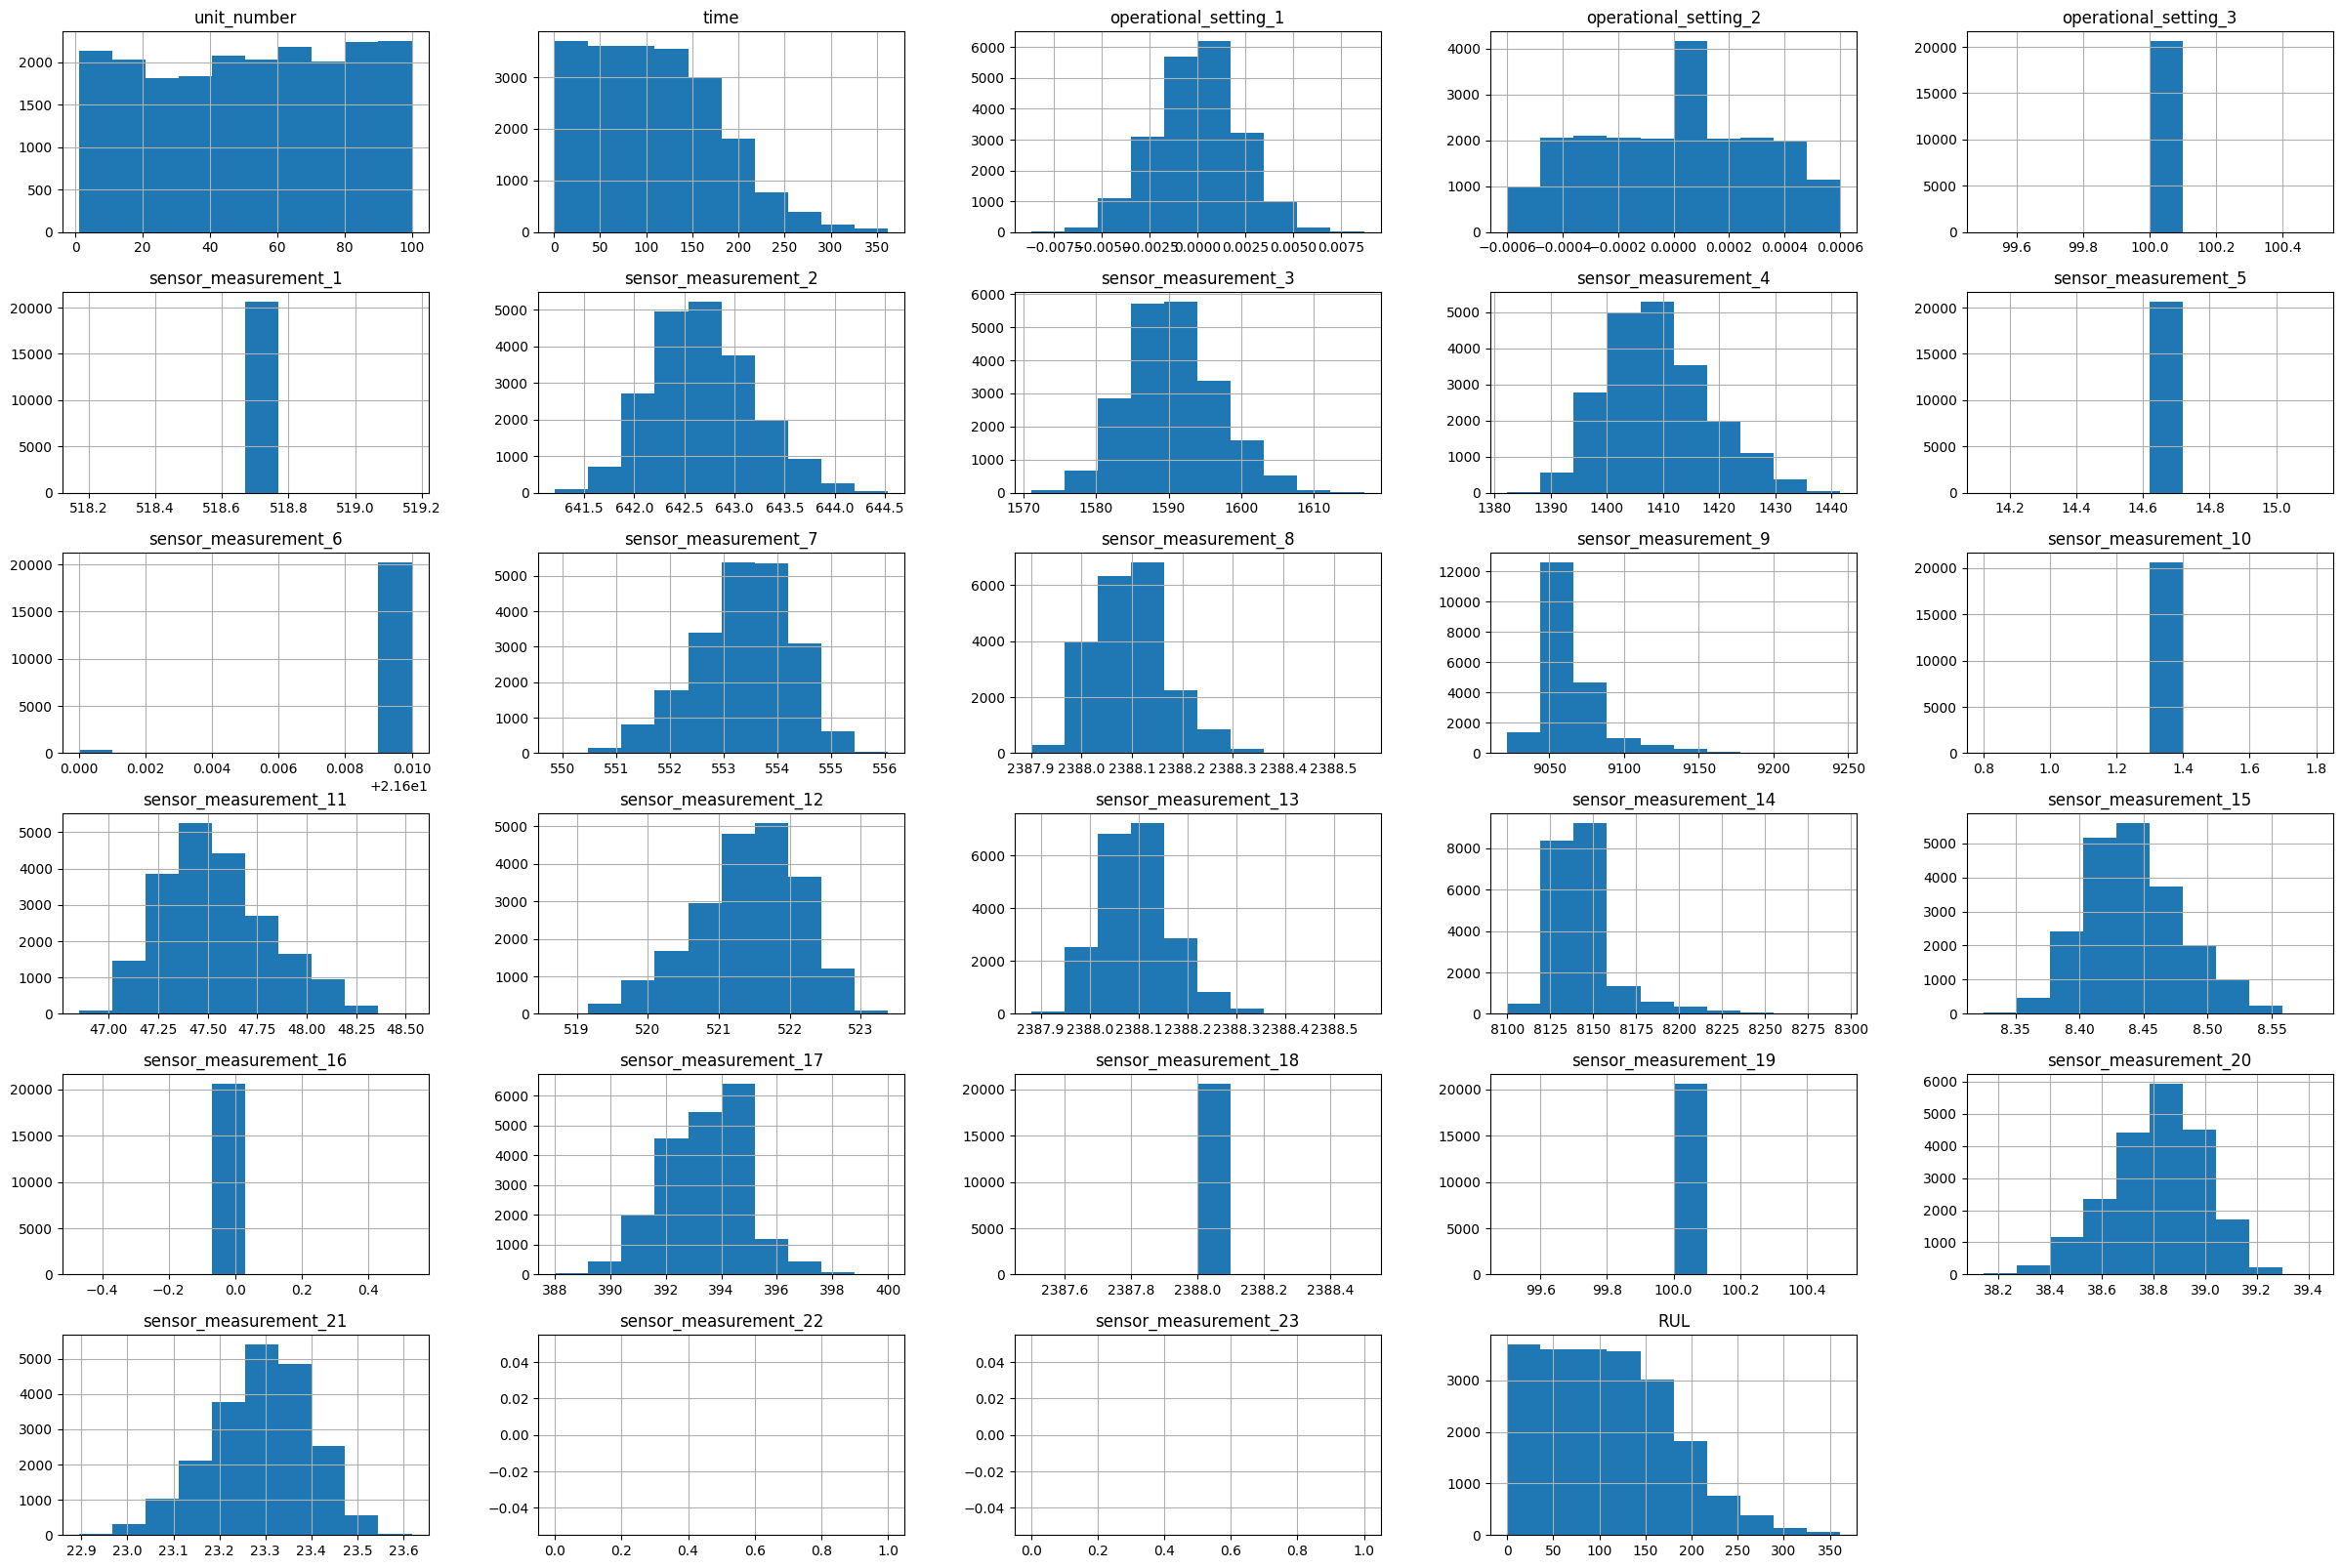

In [45]:
train_FD001.hist(figsize = (30,20))
plt.show()

In [48]:
def engineer_features(df, window=5):
    sensor_columns = [col for col in df.columns if 'sensor_measurement' in col]
    df_new = df.copy()

    for col in sensor_columns:
        # Calculate rolling average
        df_new[col + '_rollingavg'] = df_new.groupby('unit_number')[col].transform(lambda x: x.rolling(window).mean())

        # Calculate rolling max
        df_new[col + '_max'] = df_new.groupby('unit_number')[col].transform(lambda x: x.rolling(window).max())

        # Calculate rolling min
        df_new[col + '_min'] = df_new.groupby('unit_number')[col].transform(lambda x: x.rolling(window).min())

    return df_new



In [49]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
X = engineer_features(train_FD001, window=5)
y = X.pop('RUL')

models = {
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "SVM": SVR(),
}

# Identify features and target
features = list(X.columns)


# Define a pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # you can change this as needed
    ('scaler', StandardScaler())])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_preprocessed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_preprocessed)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")


XGBoost RMSE: 8.975051306452801
XGBoost MAE: 6.0625139725082455
LightGBM RMSE: 9.294037960611089
LightGBM MAE: 6.666931875714322
SVM RMSE: 37.869704909278404
SVM MAE: 26.41597428349193
